In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import ODR, Model, RealData
from scipy.optimize import curve_fit
from scipy import linalg
from scipy import optimize
import pandas as pd
import glob
import os
from scipy.signal import find_peaks
import scipy.odr as odr
import uncertainties
from IPython.display import Latex
from ipywidgets import interactive
from functools import partial

# Esto activa la visualización inline en Jupyter
%matplotlib inline

# ESPECTROS

## Tiocianinas

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elisa\AppData\Local\Temp\ipykernel_21032\47113347.py:9: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(archivo, sep="\s+", skiprows=2, header=None, names=["l", "abs"])


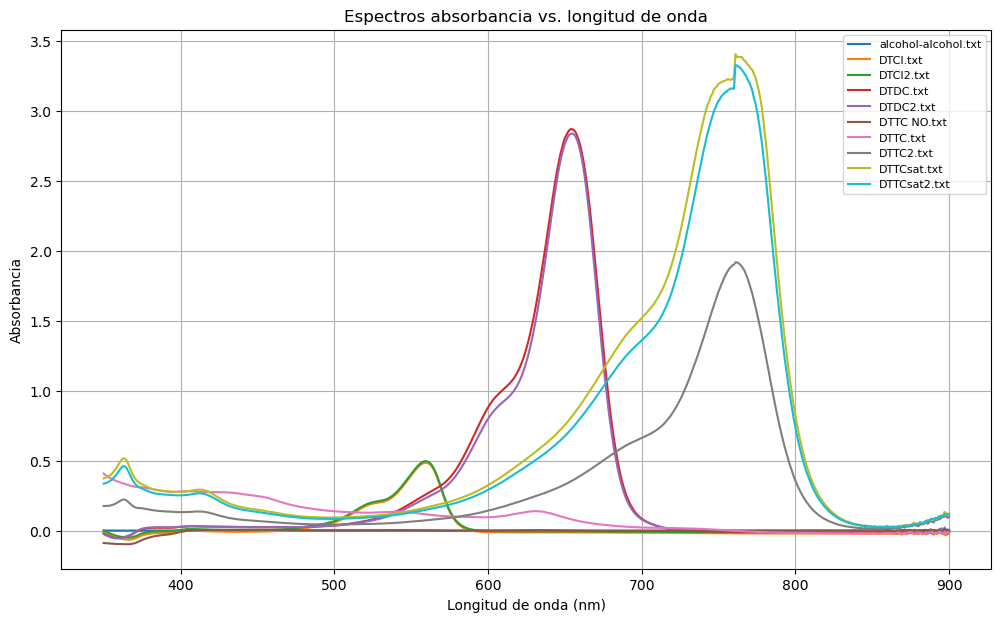

In [2]:
carpeta = r"C:\UNLP\3°\2° cuatrimestre\Exp Cuánticos I\Exp 1\TIA-cianinas"  

archivos = glob.glob(os.path.join(carpeta, "*.txt"))

plt.figure(figsize=(12,7))

for archivo in archivos:
    
    df = pd.read_csv(archivo, sep="\s+", skiprows=2, header=None, names=["l", "abs"])
    
    nombre = os.path.basename(archivo)
    plt.plot(df["l"], df["abs"], label=nombre)

plt.title("Espectros absorbancia vs. longitud de onda")
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Absorbancia")
plt.legend(loc="best", fontsize=8)
plt.grid(True)
plt.show()

## Oxocianinas

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elisa\AppData\Local\Temp\ipykernel_18356\2357943821.py:11: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(archivo, sep="\s+", skiprows=2, header=None, names=["lo", "abso"])


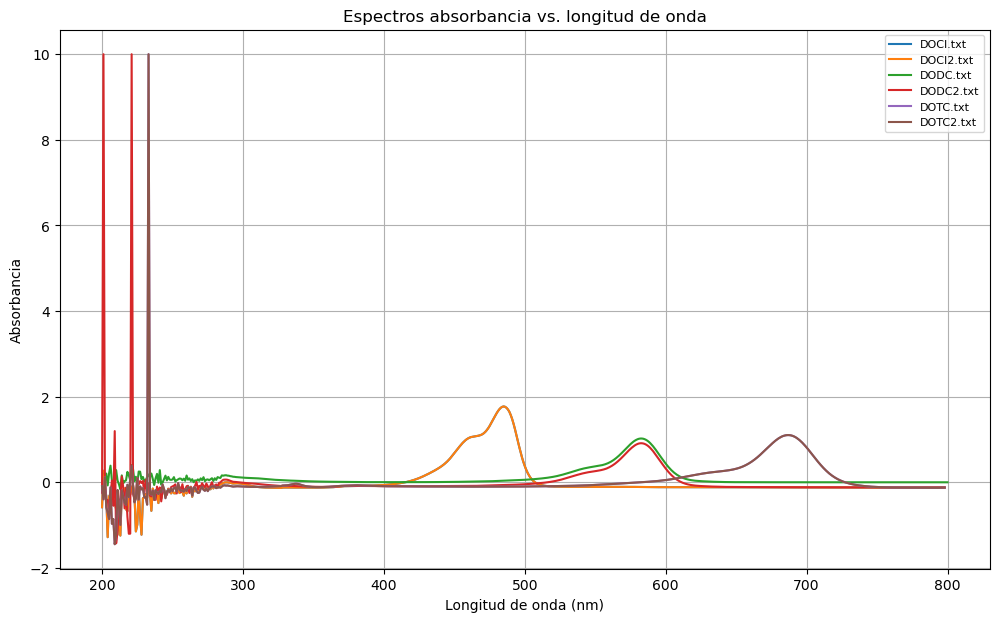

In [ ]:
carpeta = r"C:\UNLP\3°\2° cuatrimestre\Exp Cuánticos I\Exp 1\OXIcianinas"  



archivos = glob.glob(os.path.join(carpeta, "*.txt"))

plt.figure(figsize=(12,7))

for archivo in archivos:
    
    df = pd.read_csv(archivo, sep="\s+", skiprows=2, header=None, names=["lo", "abso"])
    
    nombre = os.path.basename(archivo)
    plt.plot(df["lo"], df["abso"], label=nombre)

plt.title("Espectros absorbancia vs. longitud de onda")
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Absorbancia")
plt.legend(loc="best", fontsize=8)
plt.grid(True)
plt.show()

# AJUSTES GAUSSIANAS y factor Huang Rhys

## Tiocianinas

Archivo alcohol-alcohol.txt omitido (no tiene máscara definida).

Archivo: DTCI.txt
a1 = 0.222 ± 0.001, x01 = 533.94 ± 0.17, sigma1 = 23.85 ± 0.10
a2 = 0.383 ± 0.002, x02 = 559.78 ± 0.02, sigma2 = 9.85 ± 0.04
b  = -0.017 ± 0.000
R² = 0.9912


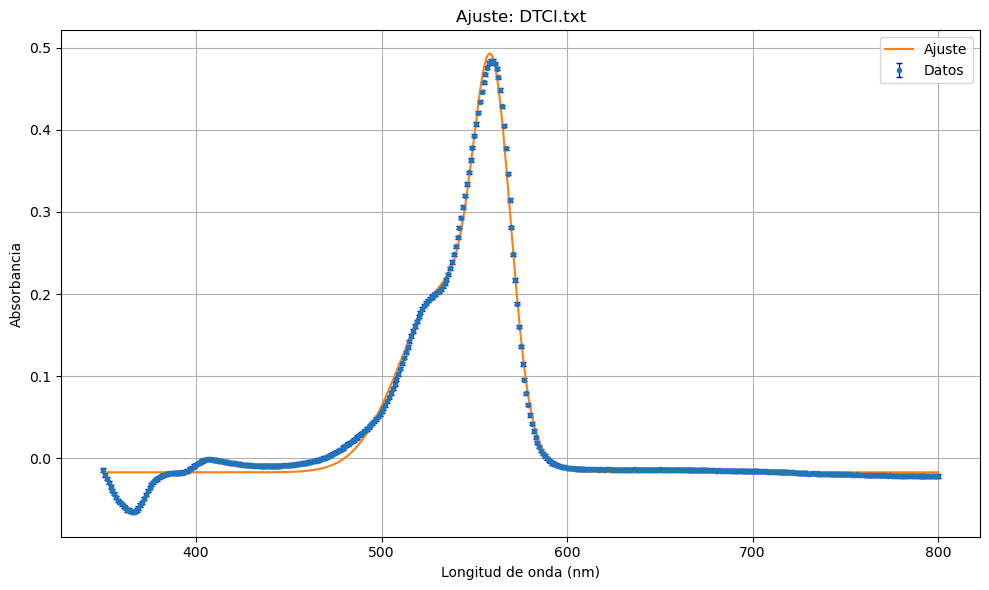

Área pico 0-0: 9.4526 ± 0.0542
Área pico 0-1: 13.2602 ± 0.0710
S = 1.403 ± 0.011

Archivo: DTCI2.txt
a1 = 0.222 ± 0.001, x01 = 533.75 ± 0.17, sigma1 = 23.76 ± 0.10
a2 = 0.386 ± 0.002, x02 = 559.75 ± 0.02, sigma2 = 9.88 ± 0.04
b  = -0.008 ± 0.000
R² = 0.9919


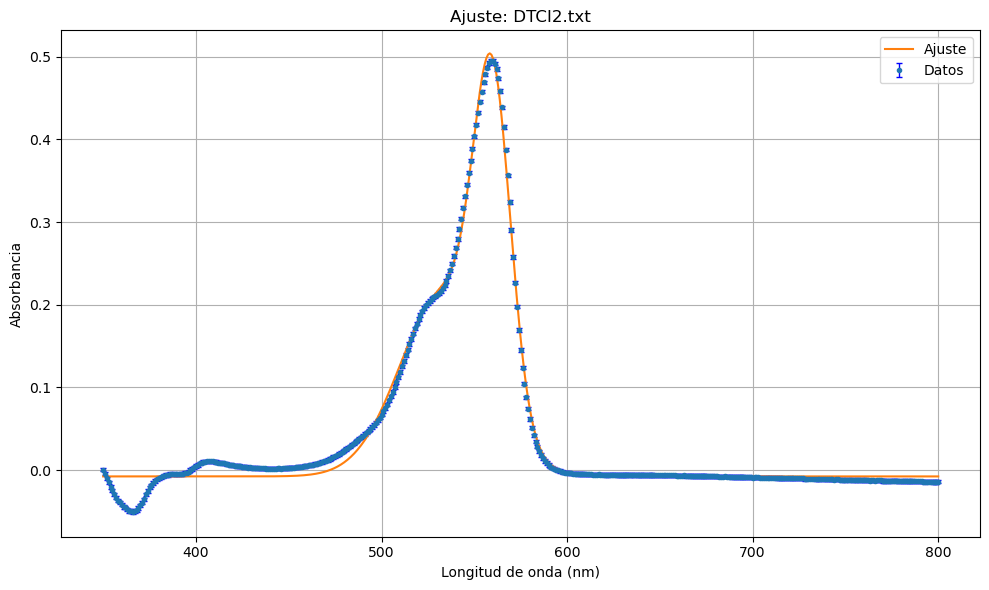

Área pico 0-0: 9.5472 ± 0.0553
Área pico 0-1: 13.2430 ± 0.0720
S = 1.387 ± 0.011

Archivo: DTDC.txt
a1 = 0.953 ± 0.001, x01 = 617.16 ± 0.08, sigma1 = 33.00 ± 0.04
a2 = 2.398 ± 0.003, x02 = 655.88 ± 0.00, sigma2 = 15.59 ± 0.01
b  = 0.013 ± 0.000
R² = 0.9979


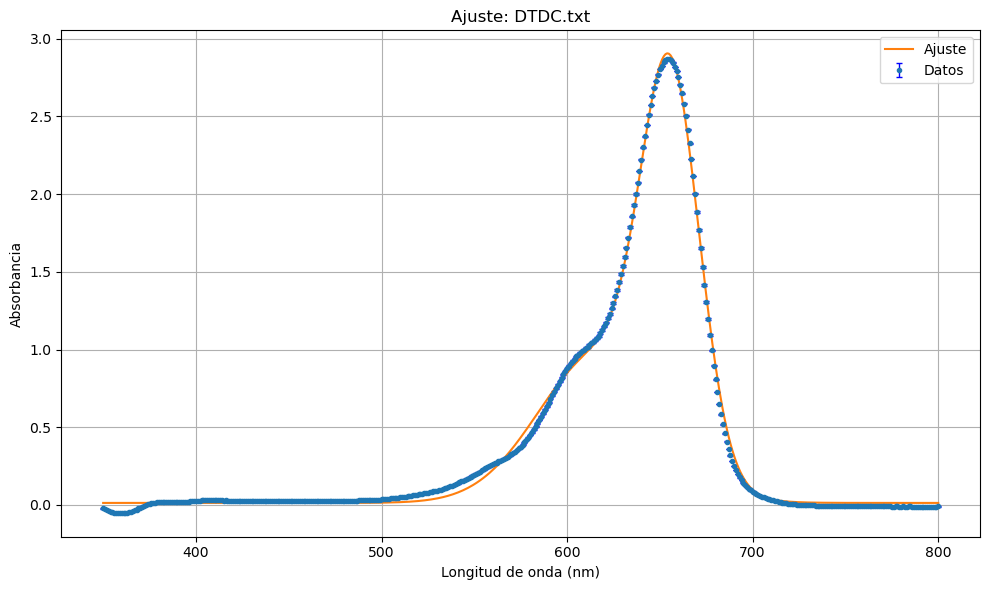

Área pico 0-0: 93.7371 ± 0.1203
Área pico 0-1: 78.8195 ± 0.1490
S = 0.841 ± 0.002

Archivo: DTDC2.txt
a1 = 0.883 ± 0.001, x01 = 618.16 ± 0.08, sigma1 = 32.70 ± 0.04
a2 = 2.385 ± 0.002, x02 = 655.68 ± 0.00, sigma2 = 15.04 ± 0.01
b  = 0.016 ± 0.000
R² = 0.9981


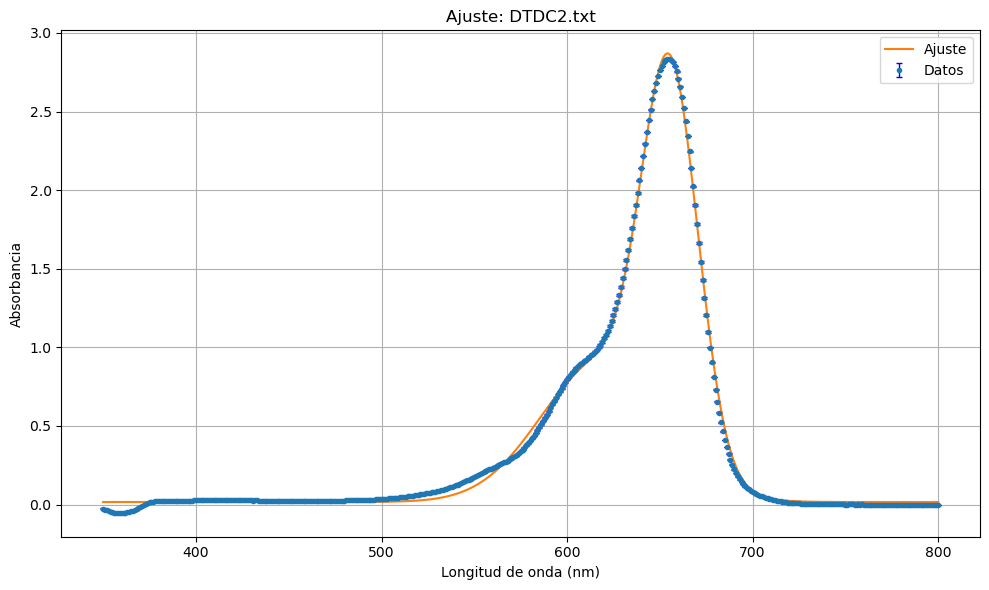

Área pico 0-0: 89.9119 ± 0.1034
Área pico 0-1: 72.4053 ± 0.1296
S = 0.805 ± 0.002
Archivo DTTC NO.txt omitido (no tiene máscara definida).
Archivo DTTC.txt omitido (no tiene máscara definida).

Archivo: DTTC2.txt
a1 = 0.587 ± 0.001, x01 = 714.94 ± 0.24, sigma1 = 49.12 ± 0.12
a2 = 1.454 ± 0.003, x02 = 761.24 ± 0.02, sigma2 = 18.99 ± 0.04
b  = 0.092 ± 0.000
R² = 0.9938


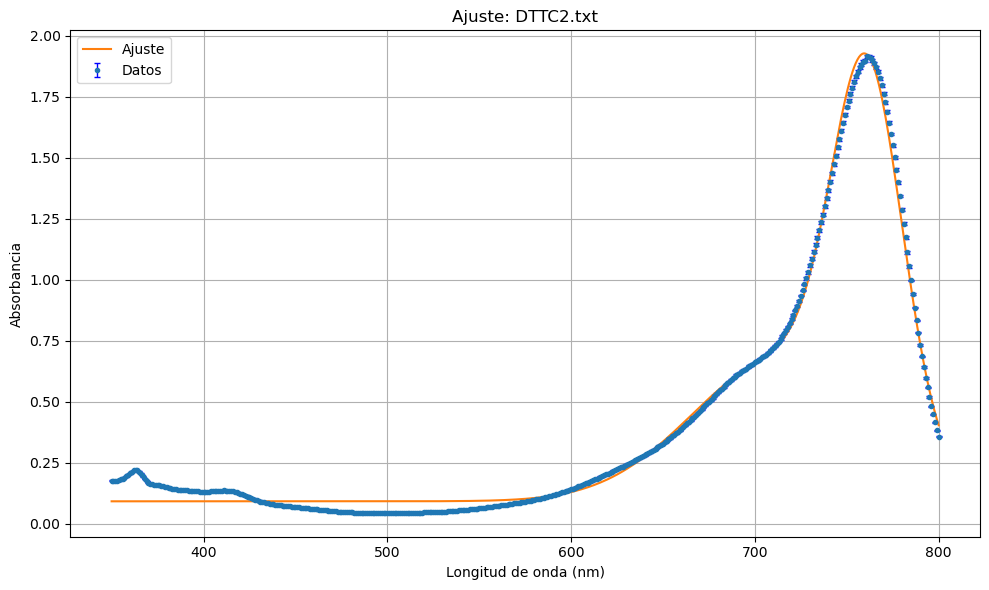

Área pico 0-0: 69.2024 ± 0.1949
Área pico 0-1: 72.2722 ± 0.2398
S = 1.044 ± 0.005
Archivo DTTCsat.txt omitido (no tiene máscara definida).
Archivo DTTCsat2.txt omitido (no tiene máscara definida).


In [ ]:

carpeta = r"C:\UNLP\3°\2° cuatrimestre\Exp Cuánticos I\Exp 1\TIA-cianinas"
archivos = glob.glob(os.path.join(carpeta, "*.txt"))

mascaras = {

    "DTDC.txt": (350, 800),
    "DTCI.txt": (350, 800),

    "DTCI2.txt": (350, 800),
    "DTDC2.txt": (350, 800),

    "DTTC2.txt": (350, 800)
}
# Función: suma de dos gaussianas + offset
def dos_gaussianas(x, a1, x01, sigma1, a2, x02, sigma2, b):
    g1 = a1 * np.exp(-((x - x01)**2) / (2*sigma1**2))
    g2 = a2 * np.exp(-((x - x02)**2) / (2*sigma2**2))
    return g1 + g2 + b

# Diccionario: parámetros iniciales manuales
parametros_iniciales = {
    "DTCI.txt":  [0.19, 524.5, 13, 0.484, 559.8, 13, -0.014],
    "DTDC.txt":  [1, 600, 13, 2.8, 655, 14, -0.007],

    "DTCI2.txt": [0.19, 524.5, 13, 0.484, 559.8, 13, -0.005],
    "DTDC2.txt": [0.8, 600, 20, 2.8, 655, 20, -0.060],
    "DTTC2.txt": [0.220, 680, 20, 2, 780, 20, 0.011]
}

# --------------------------
for archivo in archivos:
    nombre = os.path.basename(archivo)
    
    # Saltar archivos sin máscara
    if nombre not in mascaras:
        print(f"Archivo {nombre} omitido (no tiene máscara definida).")
        continue
    
    # Leer datos
    df = pd.read_csv(archivo, sep=r"\s+", skiprows=2, header=None, names=["l", "abs"])
    l = np.array(df["l"])
    abs_ = np.array(df["abs"])

    nombre = os.path.basename(archivo)
    x_min, x_max = mascaras.get(nombre, (min(l), max(l)))
    mask = (l >= x_min) & (l <= x_max)
    l_masked = l[mask]
    abs_masked = abs_[mask]

    # Errores de los datos
    sy = np.where(abs_masked < 0.5, 0.002,
        np.where(abs_masked < 1, 0.003,
        np.where(abs_masked < 2, 0.006, 0.003 / np.maximum(abs_masked, 1e-3))))
    
    # Parámetros iniciales
    beta0 = parametros_iniciales.get(nombre, [1, np.mean(l_masked)-2, 20, 0.5, np.mean(l_masked)+2, 20, min(abs_masked)])

    # Ajuste con curve_fit usando errores
    popt, pcov = curve_fit(dos_gaussianas, l_masked, abs_masked, p0=beta0, sigma=sy, absolute_sigma=True, maxfev=5000)
    a1, x01, sigma1, a2, x02, sigma2, b = popt
    err = np.sqrt(np.diag(pcov))
    err_a1, err_x01, err_sigma1, err_a2, err_x02, err_sigma2, err_b = err

    print(f"\nArchivo: {nombre}")
    print(f"a1 = {a1:.3f} ± {err_a1:.3f}, x01 = {x01:.2f} ± {err_x01:.2f}, sigma1 = {sigma1:.2f} ± {err_sigma1:.2f}")
    print(f"a2 = {a2:.3f} ± {err_a2:.3f}, x02 = {x02:.2f} ± {err_x02:.2f}, sigma2 = {sigma2:.2f} ± {err_sigma2:.2f}")
    print(f"b  = {b:.3f} ± {err_b:.3f}")
    # Cálculo de R^2
    y_model = dos_gaussianas(l_masked, *popt)
    ss_res = np.sum((abs_masked - y_model)**2)
    ss_tot = np.sum((abs_masked - np.mean(abs_masked))**2)
    r2 = 1 - ss_res / ss_tot

    print(f"R² = {r2:.4f}")

    # Graficar
    x_fit = np.linspace(x_min, x_max, 500)
    y_fit = dos_gaussianas(x_fit, *popt)

    plt.figure(figsize=(10,6))
    plt.errorbar(l_masked, abs_masked, yerr=sy, fmt='.', label='Datos', ecolor='blue', elinewidth=1, capsize=2)
    plt.plot(x_fit, y_fit, '-', label='Ajuste')
 
    plt.title(f"Ajuste: {nombre}")
    plt.xlabel("Longitud de onda (nm)")
    plt.ylabel("Absorbancia")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    # Determinar cuál es el pico principal por altura
    if a1 > a2:
        I0 = a1 * sigma1 * np.sqrt(2*np.pi)  # 0-0
        I1p = a2 * sigma2 * np.sqrt(2*np.pi)  # 0-1
    else:
        I0 = a2 * sigma2 * np.sqrt(2*np.pi)
        I1p = a1 * sigma1 * np.sqrt(2*np.pi)

    # Errores correspondientes
    if a1 > a2:
        dI0 = I0 * np.sqrt((err_a1/a1)**2 + (err_sigma1/sigma1)**2)
        dI1p = I1p * np.sqrt((err_a2/a2)**2 + (err_sigma2/sigma2)**2)
    else:
        dI0 = I0 * np.sqrt((err_a2/a2)**2 + (err_sigma2/sigma2)**2)
        dI1p = I1p * np.sqrt((err_a1/a1)**2 + (err_sigma1/sigma1)**2)

    # Factor de Huang-Rhys
    S = I1p / I0
    dS = S * np.sqrt((dI0/I0)**2 + (dI1p/I1p)**2)

    print(f"Área pico 0-0: {I0:.4f} ± {dI0:.4f}")
    print(f"Área pico 0-1: {I1p:.4f} ± {dI1p:.4f}")
    print(f"S = {S:.3f} ± {dS:.3f}")

    


## Oxocianinas

In [ ]:

# --------------------------
# Carpeta y archivos
# --------------------------
carpeta = r"C:\UNLP\3°\2° cuatrimestre\Exp Cuánticos I\Exp 1\OXIcianinas"
archivos = glob.glob(os.path.join(carpeta, "*.txt"))

# --------------------------
# Máscaras según archivo
# --------------------------
mascaras = {
    "DOCI.txt":  (350, 800),
    "DODC.txt":  (350, 800),
    "DOTC.txt":  (350, 800),
    "DOCI2.txt":  (350, 800),
    "DODC2.txt":  (350, 800),
    "DOTC2.txt":  (350, 800),
}

# --------------------------
# Función: suma de dos gaussianas + offset
# --------------------------
def dos_gaussianas(x, a1, x01, sigma1, a2, x02, sigma2, b):
    g1 = a1 * np.exp(-((x - x01)**2) / (2*sigma1**2))
    g2 = a2 * np.exp(-((x - x02)**2) / (2*sigma2**2))
    return g1 + g2 + b

# --------------------------
# Parámetros iniciales
# --------------------------
parametros_iniciales = {
    "DOCI.txt":  [1.3, 465, 13, 1.7, 480, 13, -0.014],
    "DOCI2.txt":  [1.3, 465, 13, 1.7, 480, 13, -0.014],
    "DODC.txt":  [0.25, 540, 13, 0.9, 582, 14, -0.007],
    "DODC2.txt":  [0.25, 540, 13, 0.9, 582, 14, -0.007],
    "DOTC.txt":  [0.22, 630, 20, 1.1, 685, 20, 0.093],
    "DOTC2.txt":  [0.22, 630, 20, 1.1, 685, 20, 0.093],
}

# --------------------------
# Procesar archivos
# --------------------------
for archivo in archivos:
    nombre = os.path.basename(archivo)
    
    # Leer archivo saltando las dos primeras filas
    df = pd.read_csv(archivo, sep=r"\s+", skiprows=2, header=None, names=["l", "abs"])
    l = np.array(df["l"])
    abs_ = np.array(df["abs"])

    # Aplicar máscara si existe
    x_min, x_max = mascaras.get(nombre, (min(l), max(l)))
    mask = (l >= x_min) & (l <= x_max)
    l_masked = l[mask]
    abs_masked = abs_[mask]

    # Errores de los datos (constante 0.003)
    sy = np.full_like(abs_masked, 0.003)


    # Parámetros iniciales
    beta0 = parametros_iniciales.get(nombre, [1, np.mean(l_masked)-2, 20, 0.5, np.mean(l_masked)+2, 20, min(abs_masked)])

    # Ajuste con curve_fit usando errores
    popt, pcov = curve_fit(dos_gaussianas, l_masked, abs_masked, p0=beta0, sigma=sy, absolute_sigma=True, maxfev=5000)
    a1, x01, sigma1, a2, x02, sigma2, b = popt
    err = np.sqrt(np.diag(pcov))
    err_a1, err_x01, err_sigma1, err_a2, err_x02, err_sigma2, err_b = err

    # Calcular R²
    y_model = dos_gaussianas(l_masked, *popt)
    ss_res = np.sum((abs_masked - y_model)**2)
    ss_tot = np.sum((abs_masked - np.mean(abs_masked))**2)
    r2 = 1 - ss_res / ss_tot

    # Mostrar resultados
    print(f"\nArchivo: {nombre}")
    print(f"a1 = {a1:.3f} ± {err_a1:.3f}, x01 = {x01:.2f} ± {err_x01:.2f}, sigma1 = {sigma1:.2f} ± {err_sigma1:.2f}")
    print(f"a2 = {a2:.3f} ± {err_a2:.3f}, x02 = {x02:.2f} ± {err_x02:.2f}, sigma2 = {sigma2:.2f} ± {err_sigma2:.2f}")
    print(f"b  = {b:.3f} ± {err_b:.3f}")
    print(f"R² = {r2:.4f}")

    # Graficar
    x_fit = np.linspace(x_min, x_max, 500)
    y_fit = dos_gaussianas(x_fit, *popt)

    plt.figure(figsize=(10,6))
    plt.errorbar(l_masked, abs_masked, yerr=sy, fmt='.', label='Datos', ecolor='blue', elinewidth=1, capsize=2)
    plt.plot(x_fit, y_fit, '-', label='Ajuste')

    plt.title(f"Ajuste: {nombre}")
    plt.xlabel("Longitud de onda (nm)")
    plt.ylabel("Absorbancia")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    # Determinar cuál es el pico principal por altura
    if a1 > a2:
        I0 = a1 * sigma1 * np.sqrt(2*np.pi)  # 0-0
        I1p = a2 * sigma2 * np.sqrt(2*np.pi)  # 0-1
    else:
        I0 = a2 * sigma2 * np.sqrt(2*np.pi)
        I1p = a1 * sigma1 * np.sqrt(2*np.pi)

    # Errores correspondientes
    if a1 > a2:
        dI0 = I0 * np.sqrt((err_a1/a1)**2 + (err_sigma1/sigma1)**2)
        dI1p = I1p * np.sqrt((err_a2/a2)**2 + (err_sigma2/sigma2)**2)
    else:
        dI0 = I0 * np.sqrt((err_a2/a2)**2 + (err_sigma2/sigma2)**2)
        dI1p = I1p * np.sqrt((err_a1/a1)**2 + (err_sigma1/sigma1)**2)

    # Factor de Huang-Rhys
    S = I1p / I0
    dS = S * np.sqrt((dI0/I0)**2 + (dI1p/I1p)**2)

    print(f"Área pico 0-0: {I0:.4f} ± {dI0:.4f}")
    print(f"Área pico 0-1: {I1p:.4f} ± {dI1p:.4f}")
    print(f"S = {S:.3f} ± {dS:.3f}")



# Ajuste Lambda Max

Set 1: ΔL = 2.850 Å ± 0.086 Å
Set 2: ΔL = 1.999 Å ± 0.069 Å


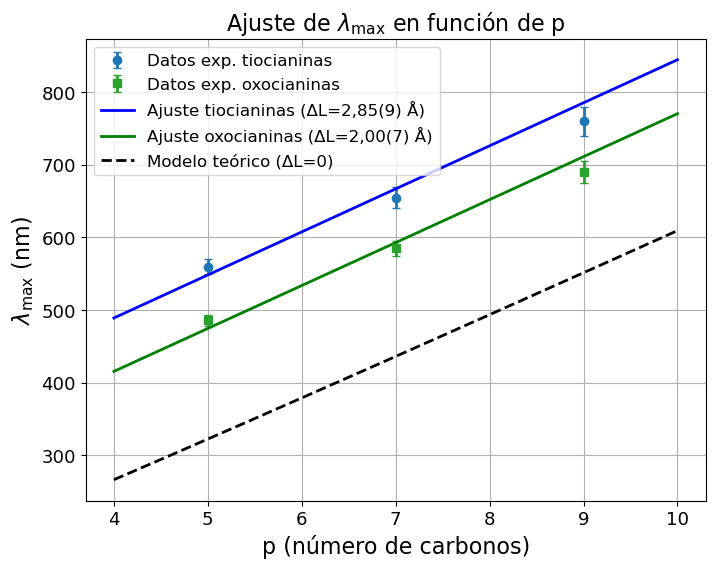

Energías Set 1 (eV): [2.216 1.894 1.633]
Energías Set 2 (eV): [2.553 2.121 1.798]
R² Set 1 (tiocianinas) = 0.9541
R² Set 2 (oxocianinas) = 0.9693


In [ ]:


# --------------------------
# Datos experimentales
# --------------------------
# Set 1
x1_data = np.array([5, 7, 9])
y1_data = np.array([560, 655, 760])  # nm
y1_err = np.array([10, 15, 20])

# Set 2
x2_data = np.array([5, 7, 9])
y2_data = np.array([486, 585, 690])  # nm
y2_err = np.array([8, 10, 15])

# --------------------------
# Constantes físicas (SI)
# --------------------------
h = 6.626e-34   # J·s
c = 3.0e8       # m/s
m = 9.11e-31    # kg
d = 1.34e-10     # m

# --------------------------
# Modelo teórico (devuelve en nm)
# --------------------------
def lambda_model(p, deltaL):
    lam_m = (8 * m * c * ((p + 2.0) * d + deltaL)**2) / (h * (p + 4.0))
    return lam_m * 1e9  # convertir a nm

# --------------------------
# Ajuste del modelo para Set 1
# --------------------------
popt1, pcov1 = curve_fit(lambda_model, x1_data, y1_data, p0=[0.0],
                         sigma=y1_err, absolute_sigma=True, maxfev=10000)
deltaL1, deltaL1_err = popt1[0], np.sqrt(np.diag(pcov1))[0]

# --------------------------
# Ajuste del modelo para Set 2
# --------------------------
popt2, pcov2 = curve_fit(lambda_model, x2_data, y2_data, p0=[0.0],
                         sigma=y2_err, absolute_sigma=True, maxfev=10000)
deltaL2, deltaL2_err = popt2[0], np.sqrt(np.diag(pcov2))[0]

# --------------------------
# Resultados
# --------------------------
print(f"Set 1: ΔL = {deltaL1*1e10:.3f} Å ± {deltaL1_err*1e10:.3f} Å")
print(f"Set 2: ΔL = {deltaL2*1e10:.3f} Å ± {deltaL2_err*1e10:.3f} Å")

# --------------------------
# Gráfico combinado
# --------------------------
p_grid = np.linspace(4, 10, 400)
lam_theoretical = (8*m*c*((p_grid+2)*d)**2)/(h*(p_grid+4))*1e9  # modelo sin ajuste
lam_fit1 = lambda_model(p_grid, deltaL1)
lam_fit2 = lambda_model(p_grid, deltaL2)

plt.figure(figsize=(8,6))

# Datos experimentales
h1 = plt.errorbar(x1_data, y1_data, yerr=y1_err, fmt='o', color="tab:blue", label="Datos exp. tiocianinas", elinewidth = 2, capsize = 3)
h2 = plt.errorbar(x2_data, y2_data, yerr=y2_err, fmt='s', color="tab:green", label="Datos exp. oxocianinas", elinewidth = 2, capsize = 3)

# Modelos
# Modelos
h3, = plt.plot(p_grid, lam_fit1, 'b-', lw=2, 
               label=f"Ajuste tiocianinas (ΔL={deltaL1*1e10:.2f}(9) Å)".replace('.', ','))
h4, = plt.plot(p_grid, lam_fit2, 'g-', lw=2, 
               label=f"Ajuste oxocianinas (ΔL={deltaL2*1e10:.2f}(7) Å)".replace('.', ','))

h5, = plt.plot(p_grid, lam_theoretical, 'k--', lw=2, label="Modelo teórico (ΔL=0)")

plt.xlabel("p (número de carbonos)", fontsize = 16)
plt.ylabel(r"$\lambda_{\max}$ (nm)", fontsize = 16)
plt.title(r"Ajuste de $\lambda_{\max}$ en función de p", fontsize = 16)
# Aumentar tamaño de los números en los ejes
plt.tick_params(axis='both', which='major', labelsize=13)

plt.grid(True)


# Ordenar manualmente los elementos de la leyenda
handles = [h1, h2, h3, h4, h5]
labels = [h.get_label() for h in handles]
plt.legend(handles, labels, fontsize=12)

plt.show()




eV = 1.602e-19  # J

def energy_from_lambda(lam_nm):
    lam_m = lam_nm * 1e-9  # pasar nm -> m
    return (h*c/lam_m) / eV  # en eV

# Ejemplo: energías de tus datos experimentales
E1 = energy_from_lambda(y1_data)  # set 1
E2 = energy_from_lambda(y2_data)  # set 2

print("Energías Set 1 (eV):", np.round(E1, 3))
print("Energías Set 2 (eV):", np.round(E2, 3))
# Valores ajustados en los puntos experimentales
y_fit1_data = lambda_model(x1_data, deltaL1)
y_fit2_data = lambda_model(x2_data, deltaL2)

# R^2 Set 1
ss_res1 = np.sum((y1_data - y_fit1_data)**2)
ss_tot1 = np.sum((y1_data - np.mean(y1_data))**2)
r2_1 = 1 - ss_res1/ss_tot1

# R^2 Set 2
ss_res2 = np.sum((y2_data - y_fit2_data)**2)
ss_tot2 = np.sum((y2_data - np.mean(y2_data))**2)
r2_2 = 1 - ss_res2/ss_tot2

print(f"R² Set 1 (tiocianinas) = {r2_1:.4f}")
print(f"R² Set 2 (oxocianinas) = {r2_2:.4f}")


# Pozo Finito

## Cálculo de V0, chi cuadrado, energía en función de p

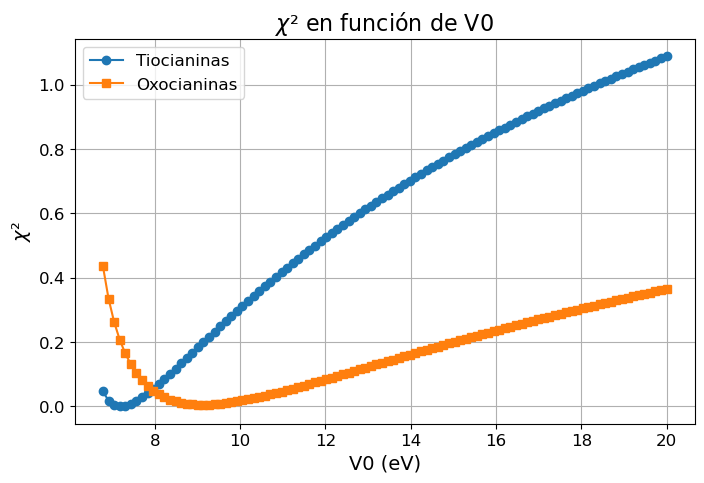

Tiocianinas: V0 óptimo = 7.174 eV, ΔE = [2.217 1.877 1.606] eV
Oxocianinas: V0 óptimo = 9.138 eV, ΔE = [2.593 2.091 1.746] eV


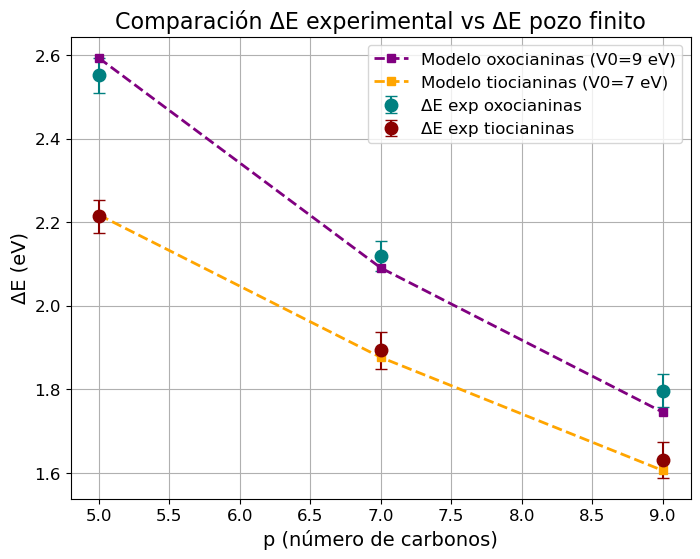

In [ ]:

# ---------------------------
# Funciones del pozo finito
# ---------------------------
def even_sol(x, theta0):
    return np.sqrt((theta0/x)**2 - 1) - np.tan(x)

def odd_sol(x, theta0):
    return np.sqrt((theta0/x)**2 - 1) + 1/np.tan(x)

def sqWellSol(theta0, step=0.01):
    esol, osol = [], []
    inc = np.arange(step, theta0, step)
    even = True
    for i in range(len(inc)-1):
        if even and even_sol(inc[i], theta0)*even_sol(inc[i+1], theta0)<0:
            esol.append(optimize.brentq(even_sol, inc[i], inc[i+1], args=(theta0,)))
            even = False
        elif not even and odd_sol(inc[i], theta0)*odd_sol(inc[i+1], theta0)<0:
            osol.append(optimize.brentq(odd_sol, inc[i], inc[i+1], args=(theta0,)))
            even = True
    return np.array(esol), np.array(osol)

def compute_levels_full(p, d=0.134, Vo=10, m=1):
    """Devuelve todos los niveles, HOMO, LUMO y ΔE HOMO-LUMO"""
    L = (p + 2)*d
    theta0 = np.sqrt(m*9.31e-31*Vo*L*L / (2*(6.58e-16)**2*1e18*1.6e-19))
    etheta, otheta = sqWellSol(theta0, step=0.01)
    
    e_eng = 2*(1.05457173e-34)**2*etheta**2/(m*9.31e-31*(L*1e-9)**2)/1.6e-19 if len(etheta)>0 else np.array([])
    o_eng = 2*(1.05457173e-34)**2*otheta**2/(m*9.31e-31*(L*1e-9)**2)/1.6e-19 if len(otheta)>0 else np.array([])
    
    all_levels = np.sort(np.concatenate([e_eng, o_eng]))
    N_electrons = p + 3
    HOMO_index = N_electrons//2 - 1
    LUMO_index = N_electrons//2
    
    if len(all_levels) <= LUMO_index:
        return all_levels, np.nan, np.nan, np.nan
    
    HOMO_energy = all_levels[HOMO_index]
    LUMO_energy = all_levels[LUMO_index]
    delta_E = LUMO_energy - HOMO_energy
    return all_levels, HOMO_energy, LUMO_energy, delta_E

# ---------------------------
# Datos experimentales
# ---------------------------
ps = np.array([5,7,9])
E_tio = np.array([2.21, 1.89, 1.63])  # ΔE Tiocianinas 
E_oxo = np.array([2.55, 2.12, 1.80])  # ΔE Oxocianinas 

# ---------------------------
# Malla de V0
# ---------------------------
V0_grid = np.linspace(0.5, 20, 150)
chi2_tio = np.zeros_like(V0_grid)
chi2_oxo = np.zeros_like(V0_grid)

DE_tio_vsV = np.full((len(ps), len(V0_grid)), np.nan)
DE_oxo_vsV = np.full((len(ps), len(V0_grid)), np.nan)

# ---------------------------
# Calcular ΔE y chi²
# ---------------------------
for j, V0 in enumerate(V0_grid):
    errs_t, errs_o = [], []
    for i, p in enumerate(ps):
        _, _, _, DE_tio = compute_levels_full(p, Vo=V0)
        _, _, _, DE_oxo = compute_levels_full(p, Vo=V0)
        if DE_tio is not None:
            DE_tio_vsV[i,j] = DE_tio
            errs_t.append(DE_tio - E_tio[i])
        if DE_oxo is not None:
            DE_oxo_vsV[i,j] = DE_oxo
            errs_o.append(DE_oxo - E_oxo[i])
    chi2_tio[j] = np.sum(np.square(errs_t)) if errs_t else np.nan
    chi2_oxo[j] = np.sum(np.square(errs_o)) if errs_o else np.nan

# ---------------------------
# Graficar chi² vs V0
# ---------------------------
plt.figure(figsize=(8,5))
plt.plot(V0_grid, chi2_tio, 'o-', label='Tiocianinas')
plt.plot(V0_grid, chi2_oxo, 's-', label='Oxocianinas')
plt.xlabel('V0 (eV)', fontsize = 14)
plt.ylabel(r'$\chi$²', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(r'$\chi$² en función de V0', fontsize = 16)
plt.grid(True)
plt.legend(fontsize = 12)
plt.show()

# ---------------------------
# Mínimo de chi² y ΔE correspondiente
# ---------------------------
idx_min_tio = np.nanargmin(chi2_tio)
idx_min_oxo = np.nanargmin(chi2_oxo)

V0_min_tio = V0_grid[idx_min_tio]
V0_min_oxo = V0_grid[idx_min_oxo]

DE_teo_min_tio = np.array([compute_levels_full(p, Vo=V0_min_tio)[3] for p in ps])
DE_teo_min_oxo = np.array([compute_levels_full(p, Vo=V0_min_oxo)[3] for p in ps])

print(f"Tiocianinas: V0 óptimo = {V0_min_tio:.3f} eV, ΔE = {np.round(DE_teo_min_tio,3)} eV")
print(f"Oxocianinas: V0 óptimo = {V0_min_oxo:.3f} eV, ΔE = {np.round(DE_teo_min_oxo,3)} eV")

# ---------------------------
# Graficar ΔE experimental vs ΔE teórico con coma decimal
# ---------------------------
plt.figure(figsize=(8,6))

# Convertir valores a strings con coma
DE_teo_min_tio_str = [f"{v:.2f}".replace('.', ',') for v in DE_teo_min_tio]
DE_teo_min_oxo_str = [f"{v:.2f}".replace('.', ',') for v in DE_teo_min_oxo]


# ----------------------------
# Datos de longitudes de onda (nm)
# ----------------------------
y1_data = np.array([560, 655, 760])  # Tiocianinas
y2_data = np.array([486, 585, 690])  # Oxocianinas

# Errores en lambda (nm)
y1_err = np.array([10, 15, 20])
y2_err = np.array([8, 10, 15])

# Constante hc en eV·nm
hc = 1240.0

# Conversion a energías
E_tio = hc / y1_data
E_oxo = hc / y2_data

# Propagación de errores: dE = hc/λ^2 * dλ
E_tio_err = hc / (y1_data**2) * y1_err
E_oxo_err = hc / (y2_data**2) * y2_err

# ----------------------------
# Graficar con barras de error
# ----------------------------
plt.errorbar(ps, E_oxo, yerr=E_oxo_err, fmt="o", ms=9,
             label="ΔE exp oxocianinas", color='teal', capsize=4)
plt.plot(ps, DE_teo_min_oxo, "s--", lw=2,
         label=f"Modelo oxocianinas (V0={V0_min_oxo:.0f} eV)",
         color='purple')

plt.errorbar(ps, E_tio, yerr=E_tio_err, fmt="o", ms=9,
             label="ΔE exp tiocianinas", color="darkred", capsize=4)
plt.plot(ps, DE_teo_min_tio, "s--", lw=2,
         label=f"Modelo tiocianinas (V0={V0_min_tio:.0f} eV)",
         color='orange')

plt.xlabel("p (número de carbonos)", fontsize=14)
plt.ylabel("ΔE (eV)", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title("Comparación ΔE experimental vs ΔE pozo finito", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


## error en V0

In [ ]:
# ---------------------------
# Refinar malla alrededor del mínimo de chi² para Tiocianinas
# ---------------------------
delta = 0.5  # eV, ancho de la ventana alrededor del mínimo
V0_fine_tio = np.linspace(V0_min_tio - delta, V0_min_tio + delta, 200)

chi2_tio_fine = np.zeros_like(V0_fine_tio)
for j, V0 in enumerate(V0_fine_tio):
    errs_t = []
    for i, p in enumerate(ps):
        _, _, _, DE_tio = compute_levels_full(p, Vo=V0)
        if DE_tio is not None:
            errs_t.append(DE_tio - E_tio[i])
    chi2_tio_fine[j] = np.sum(np.square(errs_t)) if errs_t else np.nan

# Mínimo en la malla refinada
idx_min_fine_tio = np.nanargmin(chi2_tio_fine)
V0_min_tio_refined = V0_fine_tio[idx_min_fine_tio]

# Paso de la malla fina
h_tio = V0_fine_tio[1] - V0_fine_tio[0]

# Segunda derivada centrada
d2_chi2_tio = (chi2_tio_fine[idx_min_fine_tio+1]
                - 2*chi2_tio_fine[idx_min_fine_tio]
                + chi2_tio_fine[idx_min_fine_tio-1]) / h_tio**2

# Error en V0 usando Hessiana
sigma_V0_tio = 1/np.sqrt(0.5*d2_chi2_tio)

print(f"Tiocianinas: V0 = {V0_min_tio_refined:.3f} ± {sigma_V0_tio:.3f} eV")


# ---------------------------
# Lo mismo para Oxocianinas
# ---------------------------
V0_fine_oxo = np.linspace(V0_min_oxo - delta, V0_min_oxo + delta, 200)

chi2_oxo_fine = np.zeros_like(V0_fine_oxo)
for j, V0 in enumerate(V0_fine_oxo):
    errs_o = []
    for i, p in enumerate(ps):
        _, _, _, DE_oxo = compute_levels_full(p, Vo=V0)
        if DE_oxo is not None:
            errs_o.append(DE_oxo - E_oxo[i])
    chi2_oxo_fine[j] = np.sum(np.square(errs_o)) if errs_o else np.nan

idx_min_fine_oxo = np.nanargmin(chi2_oxo_fine)
V0_min_oxo_refined = V0_fine_oxo[idx_min_fine_oxo]

h_oxo = V0_fine_oxo[1] - V0_fine_oxo[0]

d2_chi2_oxo = (chi2_oxo_fine[idx_min_fine_oxo+1]
                - 2*chi2_oxo_fine[idx_min_fine_oxo]
                + chi2_oxo_fine[idx_min_fine_oxo-1]) / h_oxo**2

sigma_V0_oxo = 1/np.sqrt(0.5*d2_chi2_oxo)

print(f"Oxocianinas: V0 = {V0_min_oxo_refined:.3f} ± {sigma_V0_oxo:.3f} eV")
# ---------------------------
# Derivada de ΔE respecto a V0 (diferencias finitas centradas)
# ---------------------------
h = 1e-3  # paso pequeño para derivada de ΔE

# Tiocianinas
DE_plus = np.array([compute_levels_full(p, Vo=V0_min_tio_refined+h)[3] for p in ps])
DE_minus = np.array([compute_levels_full(p, Vo=V0_min_tio_refined-h)[3] for p in ps])
dDE_dV0_tio = (DE_plus - DE_minus) / (2*h)

sigma_DE_tio = np.abs(dDE_dV0_tio) * sigma_V0_tio

# Oxocianinas
DE_plus = np.array([compute_levels_full(p, Vo=V0_min_oxo_refined+h)[3] for p in ps])
DE_minus = np.array([compute_levels_full(p, Vo=V0_min_oxo_refined-h)[3] for p in ps])
dDE_dV0_oxo = (DE_plus - DE_minus) / (2*h)

sigma_DE_oxo = np.abs(dDE_dV0_oxo) * sigma_V0_oxo
print("Tiocianinas:")
for p, DE, err in zip(ps, DE_teo_min_tio, sigma_DE_tio):
    print(f"p={p}, ΔE = {DE:.3f} ± {err:.3f} eV")

print("\nOxocianinas:")
for p, DE, err in zip(ps, DE_teo_min_oxo, sigma_DE_oxo):
    print(f"p={p}, ΔE = {DE:.3f} ± {err:.3f} eV")


Tiocianinas: V0 = 7.192 ± 2.471 eV
Oxocianinas: V0 = 9.115 ± 7.025 eV
Tiocianinas:
p=5, ΔE = 2.217 ± 0.849 eV
p=7, ΔE = 1.877 ± 0.453 eV
p=9, ΔE = 1.606 ± 0.287 eV

Oxocianinas:
p=5, ΔE = 2.593 ± 0.816 eV
p=7, ΔE = 2.091 ± 0.484 eV
p=9, ΔE = 1.746 ± 0.320 eV


## intersecciones

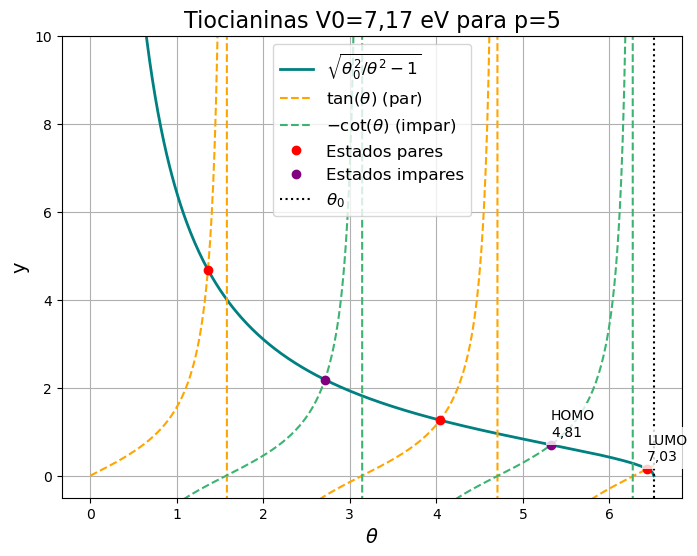

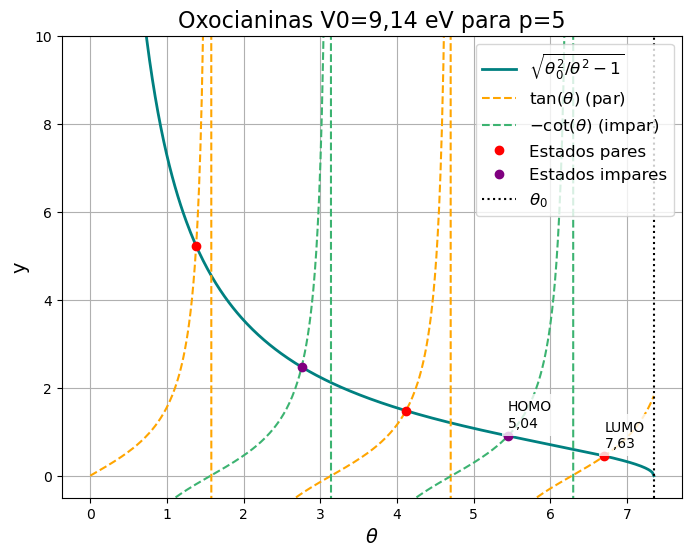

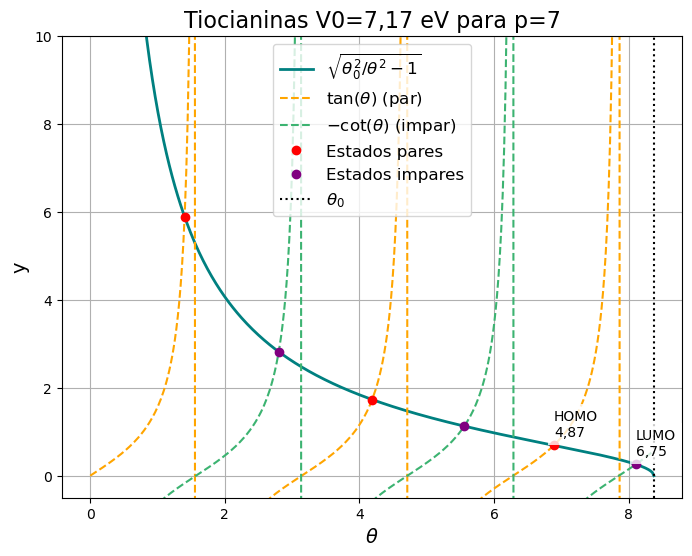

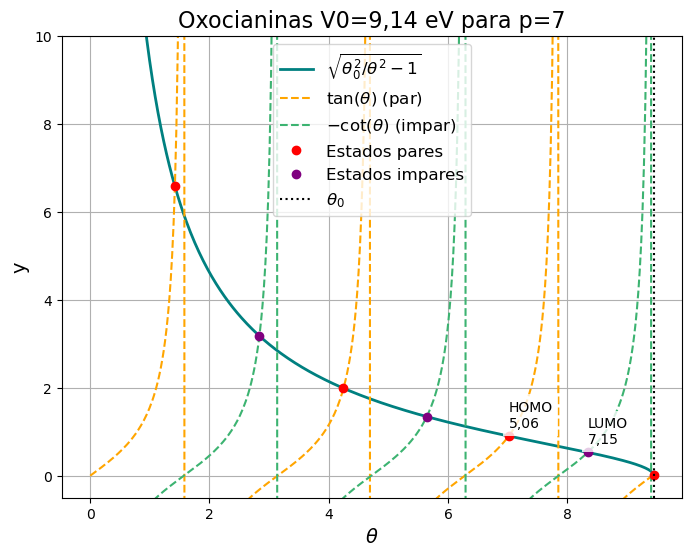

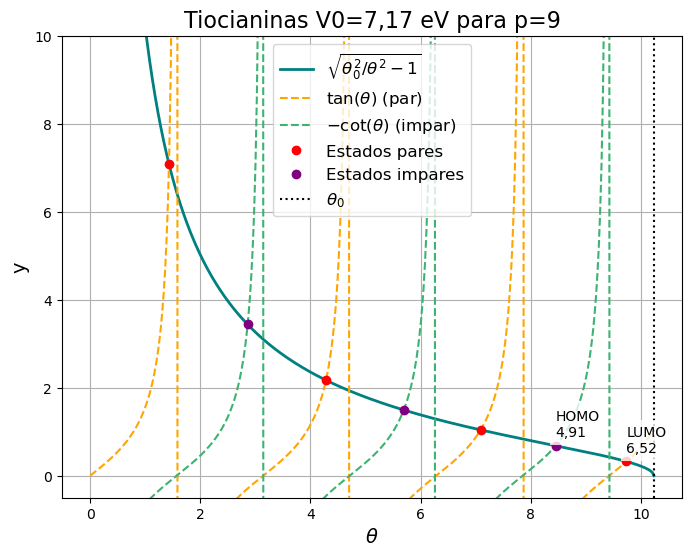

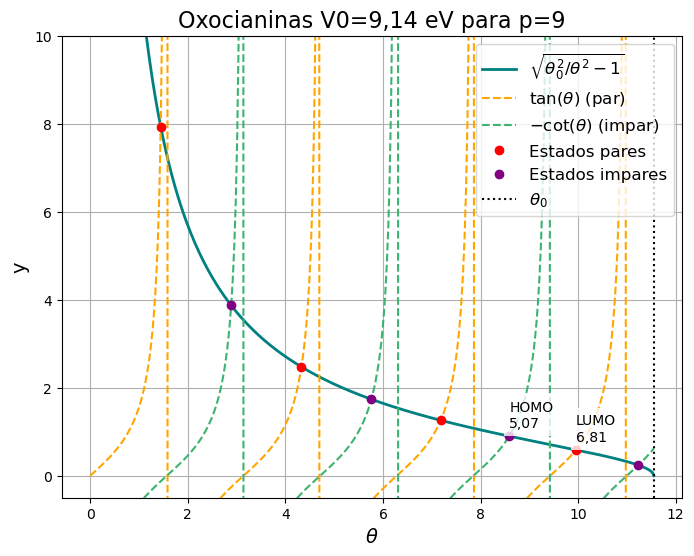

In [ ]:
# ---------------------------
# Función para graficar intersecciones del pozo finito para un p
# ---------------------------
def plot_fsw_intersections_single(V0, p, title=""):
    L_cc = 0.134  # nm
    L = (p + 2) * L_cc
    theta0 = np.sqrt(1 * 9.31e-31 * V0 * L**2 / (2 * (6.58e-16)**2 * 1e18 * 1.6e-19))
    
    # Resolver niveles
    etheta, otheta = sqWellSol(theta0)
    all_theta = np.sort(np.concatenate([etheta, otheta]))
    
    # Energías
    energies = 2*(1.05457173e-34)**2 * all_theta**2 / (1*9.31e-31*(L*1e-9)**2) / 1.6e-19
    N_electrons = p + 3
    HOMO_idx = N_electrons//2 - 1
    LUMO_idx = N_electrons//2
    HOMO = energies[HOMO_idx] if HOMO_idx < len(energies) else np.nan
    LUMO = energies[LUMO_idx] if LUMO_idx < len(energies) else np.nan
    
    # Colores fijos
    color_g = 'teal'
    color_even = 'orange'
    color_odd = 'mediumseagreen'
    
    # Grilla
    theta_grid = np.linspace(1e-4, theta0, 400)
    g = lambda th: np.sqrt(theta0**2 / th**2 - 1)
    
    plt.figure(figsize=(8,6))
    
    # Funciones
    plt.plot(theta_grid, g(theta_grid), lw=2, color=color_g, label=r'$\sqrt{\theta_0^2/\theta^2-1}$')
    plt.plot(theta_grid, np.tan(theta_grid), '--', color=color_even, label=r'$\tan(\theta)$ (par)')
    plt.plot(theta_grid, -1/np.tan(theta_grid), '--', color=color_odd, label=r'$-\cot(\theta)$ (impar)')
    
    # Intersecciones
    plt.plot(etheta, np.tan(etheta), 'o', color="red", label='Estados pares')
    plt.plot(otheta, -1/np.tan(otheta), 'o', color="purple", label='Estados impares')
    
    # HOMO/LUMO con recuadro blanco y coma
    bbox_props = dict(facecolor='white', alpha=0.8, edgecolor='none')
    if not np.isnan(HOMO):
        plt.text(all_theta[HOMO_idx], g(all_theta[HOMO_idx])+0.2,
                 f'HOMO\n{HOMO:.2f}'.replace('.',','), color='black', bbox=bbox_props)
    if not np.isnan(LUMO):
        plt.text(all_theta[LUMO_idx], g(all_theta[LUMO_idx])+0.2,
                 f'LUMO\n{LUMO:.2f}'.replace('.',','), color='black', bbox=bbox_props)
    
    plt.axvline(theta0, linestyle=':', color='black', label=r'$\theta_0$')
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.title(title, fontsize=16)
    plt.ylim(-0.5, 10)
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.show()


# ---------------------------
# Graficar para cada p por separado
# ---------------------------
# ---------------------------
# Graficar para cada p por separado con V0 con 2 decimales
# ---------------------------
for p_val in [5,7,9]:
    plot_fsw_intersections_single(
        V0_min_tio,
        p_val,
        title=f"Tiocianinas V0={V0_min_tio:.2f}".replace('.',',') + f" eV para p={p_val}"
    )
    plot_fsw_intersections_single(
        V0_min_oxo,
        p_val,
        title=f"Oxocianinas V0={V0_min_oxo:.2f}".replace('.',',') + f" eV para p={p_val}"
    )
